Credit card fraud detection
===

Real-life classification problems consist of many cases in which the data is not "beautifully" balanced. In such cases, one may find the accuracy score of over 90%, but that may not be the happy ending. This is because we often want to focus only on the minority class, as it plays more important role in such problems. In order to tackle this, we need to come up with proper evaluation metrics and resampling techniques. One of the popular problem regarding imbalanced dataset is Credit Card Fraud Detection. Throughout this problem, we can illustrate well what we need to handle such an imbalanced dataset.

![Img](https://raw.githubusercontent.com/tranctan96/Credit-Card-Fraud-Detection-Img/master/Credit-card-fraud.jpg)

### Understanding the dataset

- **Class**: 0 - non-fraud, 1 - fraud
- **Amount**: Transaction's amount
- **V1,V2...V28**: These are anonymous features, due to confidentiality. Additionally, these are numerical values which are results of PCA transformation.
- **Time**: The amount of seconds elapsed between each transaction and the first transaction in the dataset.

## 1. Data Analysis
Let's import libraries first:

In [0]:
# Import libraries: pandas, numpy, matplotlib, seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Read csv file "creditcard.csv" as data and take a look at dataset

In [0]:
# Read dataset with extra params sep='\t', encoding="latin-1"
from google.colab import drive
drive.mount("/content/gdrive")
# Your code here
data = pd.read_csv("gdrive/My Drive/Colab Notebooks/creditcard.csv")
data.head()



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Get brief information about dataset, how many observations, columns, columns' type

In [0]:
# Your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [0]:
# Another way to check for null
# hint: isnull()
# Your code here
data.isnull().any().any()

False

In [0]:
# Statistical view of dataset
# Your code here
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## 2. Explore Data Analysis
### Visualization & Preprocessing

#### Remember the anonymized predictors that is already transformed with PCA ?
Let check it, plot histogram for **'V1', 'V2', 'Time', 'Amount'** columns

hint: 
1. Use sns.distplot
2. Multiple plot
https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html#plt.subplot:-Simple-Grids-of-Subplots

KeyError: ignored

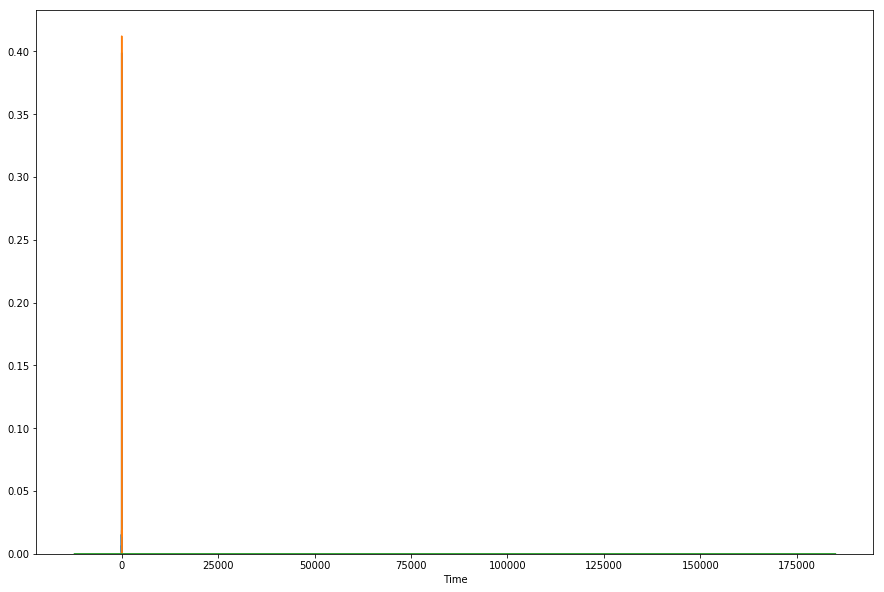

In [0]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2,2)
#### Remember the anonymized predictors that is already transformed with PCA ?
cols=['V1','V2','Time','Account']
plt.figure(figsize=(15, 10)) # Set figsize

for idx,col in enumerate(cols):
  sns.distplot(data[col],)
  
plt.show()

Here we still have two predictors **Amount** and **Time** that has not been scaled yet. So we need to normalize these features also. Using **sklearn.preprocessing.StandardScaler** for this task

In [0]:
from sklearn.preprocessing import StandardScaler

# create StandardScaler and assign to std_scaler
std_scaler = StandardScaler()
# std_scaler.fit([data['Amount']])
# std_scaler.fit([data['Time']])
# fit_transform "Amount", "Time" columns and replace old values with transformed values
data['Amount']= std_scaler.fit_transform(data[['Amount']])
data['Time']= std_scaler.fit_transform(data[['Time']])
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


### plot histogram for 'V1', 'V2', 'Time', 'Amount' columns again to check 

1.   Élément de liste
2.   Élément de liste

result

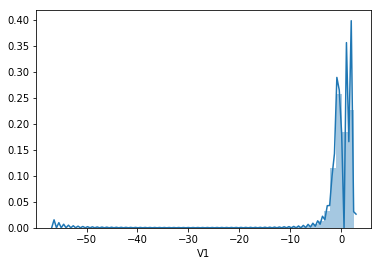

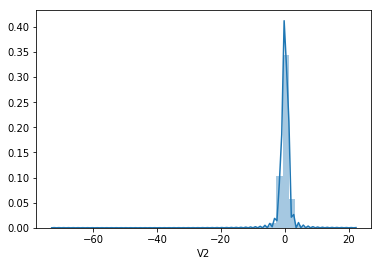

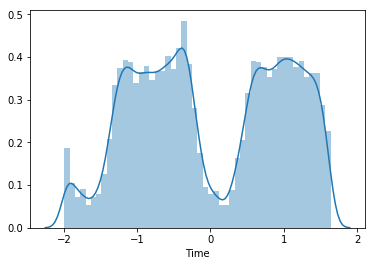

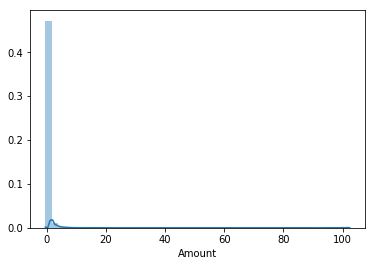

In [0]:
# plt.figure(figsize=(15, 10)) # Set figsize
# for i in range(1, 5):
#     plt.subplot(data['V1']
#     plt.text(0.5, 0.5, str((2, 3, i)),
#              fontsize=18, ha='center')

# plt.show()
# fig, axs = plt.subplots(1,4)
sns.distplot(data['V1'])
plt.show()
sns.distplot(data['V2'])
plt.show()
sns.distplot(data['Time'])
plt.show()
sns.distplot(data['Amount'])
plt.show()

In [0]:
plt.figure(figsize=(15, 10)) # Set figsize
# Your code here

plt.show()

<Figure size 1080x720 with 0 Axes>

### Plotting target classes
In order to check how skewed our data is, let's check for the percentage of each class:

Hint: Base on "Class" columns
- 0: No Fraud
- 1: Fraud

In [0]:
# Check ratio between classes
percentage_fraud =len(data[data['Class']==1])/len(data) # Your code here: number of fraud / total of observation
percentage_no_fraud =len(data[data['Class']==0])/len(data) # Your code here: number of no fraud / total of observation

print ('Percentage Fraud transactions: ', percentage_fraud)
print ('Percentage No-fraud transactions: ', percentage_no_fraud)

Percentage Fraud transactions:  0.001727485630620034
Percentage No-fraud transactions:  0.9982725143693799


#### Easily find out, this dataset is heavily skewed.
#### Data is beautiful, so let's plot it to visualize the skewness:

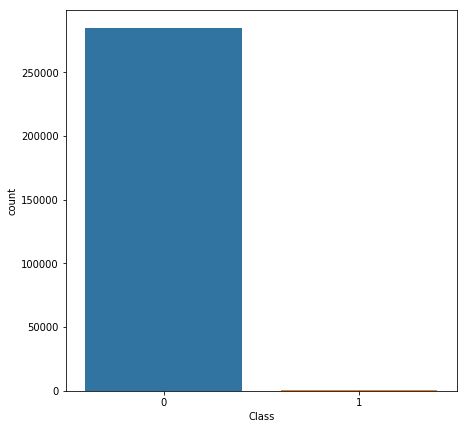

In [0]:
fig = plt.figure(figsize=(7,7)) # Set figsize
sns.countplot(data['Class'])
plt.show()

### Approaches to handle imbalanced data
Refs: https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/

Dealing with imbalanced datasets entails strategies such as improving classification algorithms or balancing classes in the training data (data resampling) before providing the data as input to the machine learning algorithm. The later technique is preferred as it has wider application.

#### Data-level techniques (Data resampling):
Refs: 
- https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
- https://beckernick.github.io/oversampling-modeling/

Despite the advantage of balancing classes, these techniques also have their weaknesses. The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. Whereas in under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.
![alt text](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png "Resampling methods")

- Random over-sampling
- Random under-sampling
- SMOTE (Synthetic Minority Over-sampling Technique)
- ...

#### Algorithm-level techniques:
- Algorithmic ensemble techniques
    - Bagging-based 
    - Boosting-based
    - Adaptive Boosting - Ada Boost
    - Gradient Tree Boosting
    - XG Boost
    - ...

#### Improving classification algorithm
- Using built-in **class_weight** option from sklearn models:
    - Logistic regresion
    - [SVM](http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html)
    - ...


## Assigning X and y for Original dataset

In [0]:
# Original data
X = data.drop(columns="Class")# Your code here: Keep all columns except for "Class"
y = data['Class']# Your code here: "Class" column

print ('X shape:', X.shape)
print ('y shape:', y.shape)

X shape: (284807, 30)
y shape: (284807,)


#### Train/Test split original data

In [0]:
# import train_test_split
from sklearn.model_selection import train_test_split
# Your code here

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

print("Number transactions training dataset: ", len(X_train))
print("Number transactions testing dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions training dataset:  199364
Number transactions testing dataset:  85443
Total number of transactions:  284807


## Obtaining smaller training data

As the total number of transactions is too large, which may damage your computer. We obtain the smaller training dataset with the same ratio of classes of original training dataset.

In [0]:
training_data = pd.concat ([X_train,y_train],axis = 1)
training_data['Class'].value_counts()

0    199016
1       348
Name: Class, dtype: int64

In [0]:
print ('Percentage original fraud: ', percentage_fraud)
print ('Percentage original no-fraud: ', percentage_no_fraud)
number_of_instances = 100000
# We will obtain maximum 100.000 data instances with the same class ratio of original data.
# Therefore, new data will have 0.17% fraud and 99.83% non-fraud of 100.000.
# Which means, new data will have 170 fraud transactions and 99830 non-fraud transactions.

number_sub_fraud = int (percentage_fraud*100/100 * number_of_instances)
number_sub_non_fraud = int (percentage_no_fraud*100/100 * number_of_instances)

sub_fraud_data = training_data[training_data['Class'] == 1].head(number_sub_fraud)
sub_non_fraud_data = training_data[training_data['Class'] == 0].head(number_sub_non_fraud)

print ('Number of newly sub fraud data:',len(sub_fraud_data))
print ('Number of newly sub non-fraud data:',len(sub_non_fraud_data))

sub_training_data = pd.concat ([sub_fraud_data, sub_non_fraud_data], axis = 0)
sub_training_data['Class'].value_counts()

Percentage original fraud:  0.001727485630620034
Percentage original no-fraud:  0.9982725143693799
Number of newly sub fraud data: 172
Number of newly sub non-fraud data: 99827


0    99827
1      172
Name: Class, dtype: int64

#### Randomly Under-Sampling the Training Dataset
For simplicity, i use DataFrame.sample() to randomly sample the instances of each class:

Percentage of normal transactions: 0.5
Percentage of fraud transactions: 0.5
Total number of transactions in resampled data: 696


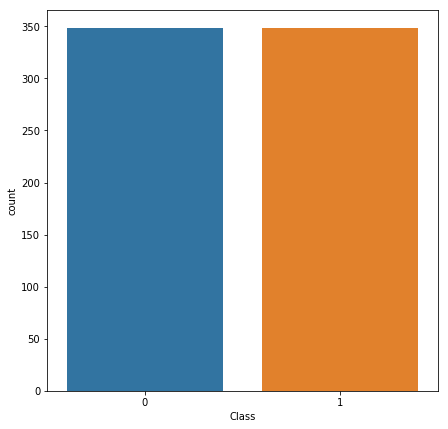

In [0]:
# Fraud/non-fraud data
# Select row which "Class" is 1 and save in fraud_data
fraud_data = training_data[training_data['Class']==1]
# Select row which "Class" is 0 and save in non_fraud_data
non_fraud_data = training_data[training_data['Class']==0]

# Number of fraud, non-fraud transactions
number_records_fraud =fraud_data.shape[0]
number_records_non_fraud =non_fraud_data.shape[0]

# Using sample function on data frame to randomly select number_records_fraud from non_fraud_data data frame
under_sample_non_fraud = non_fraud_data.sample(number_records_fraud)
# **concat** under_sample_non_fraud and fraud_data to form under_sample_data
under_sample_data = pd.concat ([ fraud_data,under_sample_non_fraud], axis = 0)

# Showing ratio
print("Percentage of normal transactions: "+str(len(under_sample_non_fraud)/(len(under_sample_non_fraud)+len(fraud_data)) ))
print("Percentage of fraud transactions: "+ str(len(fraud_data)/(len(under_sample_non_fraud)+len(fraud_data)) ))
print("Total number of transactions in resampled data: "+ str(len(under_sample_non_fraud)+len(fraud_data)) )

# Assigning X,y for Under-sampled Data
X_train_undersample = under_sample_data.drop(columns="Class")
y_train_undersample = under_sample_data['Class']

# Plot countplot
plt.figure(figsize=(7,7))
sns.countplot(under_sample_data['Class'])
plt.show()

#### Randomly Over-Sampling the Training Dataset
I do the same with over-sampling technique.

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  199654


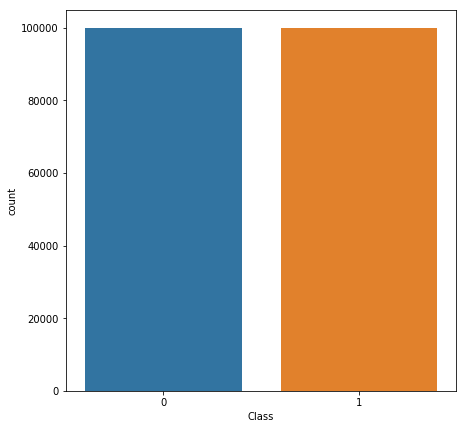

In [0]:
# Fraud/non-fraud data
# Select row which "Class" is 1 and save in fraud_data
fraud_data = sub_training_data[sub_training_data['Class']==1]
# Select row which "Class" is 0 and save in non_fraud_data
non_fraud_data = sub_training_data[sub_training_data['Class']==0]

# Number of fraud, non-fraud transactions
number_records_fraud = fraud_data.shape[0]
number_records_non_fraud = non_fraud_data.shape[0]

# Using sample on fraud_data with replacement "replace = True",  since we take a larger sample than population
over_sample_fraud = fraud_data.sample(number_records_non_fraud,replace=True)
# **concat** over_sample_fraud and non_fraud_data to form under_sample_data
over_sample_data =pd.concat([non_fraud_data,over_sample_fraud])

# Showing ratio
print("Percentage of normal transactions: ",1- over_sample_data['Class'].mean())
print("Percentage of fraud transactions: ", over_sample_data['Class'].mean())
print("Total number of transactions in resampled data: ",over_sample_data.shape[0])

# Assigning X, y for over-sampled dataset
X_train_oversample = over_sample_data.drop(columns=["Class"])
y_train_oversample = over_sample_data['Class']

# Plot countplot
plt.figure(figsize=(7,7))
sns.countplot(over_sample_data['Class'])
plt.show()

## 3. Modeling

In [0]:
# Spot check with LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, BernoulliNB, GaussianNB, SVM
# Import lib
# Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import BernoulliNB
# from sklearn.model_selection import GaussianNB
from sklearn.svm import SVC

lr = LogisticRegression() # Your code here: create logistic regression model
dtc = DecisionTreeClassifier()# Your code here: create decision tree model
rfc = RandomForestClassifier()# Your code here: create random forest model
# bnb = BernoulliNB()# Your code here: create BernoulliNB model
# gnb = GaussianNB# Your code here: create GaussianNB model
svm = SVC()# Your code here: create SVM model

models = [lr, dtc, rfc, svm]
models_name = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM"]

## 4. Evaluation Metrics
This is a clear example where using a typical accuracy score to evaluate our classification algorithm. For example, if we just used a majority class to assign values to all records, we will still be having a high accuracy, BUT WE WOULD BE CLASSIFYING ALL "1" INCORRECTLY!


[Choosing the right metrics for classification problems](https://medium.com/usf-msds/choosing-the-right-metric-for-evaluating-machine-learning-models-part-2-86d5649a5428)

[Evaluation metrics for classification problems](https://medium.com/greyatom/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b)

[What should be used for evaluating a model on an imbalanced data set ?](https://towardsdatascience.com/what-metrics-should-we-use-on-imbalanced-data-set-precision-recall-roc-e2e79252aeba)
- Precision + Recall
- ROC = TPR + FPR

Briefly explained: 
- **Precision/Recall** focus more on **Positive** class than **Negative** class.
- **TPR/FPR (ROC metrics)** measure the ability to distinguish between the classes of model.

- The higher the **Precision/Recall**, the better the ability of predicting **Positive** class of the model. 
- **TPR** is actually **Recall**.
- **FPR** is actually **Low Recall** for **Negative** class. The higher the **FPR**, the worse the ability of predicting **Negative** class of the model (which is not a good model).


### Precision, Recall, F1-score

We are very interested in the recall score, because that is the metric that will help us try to capture the most fraudulent transactions. If you think how Accuracy, Precision and Recall work for a confusion matrix, recall would be the most interesting:

- **Accuracy** = (TP+TN)/total
- **Precision** = TP/(TP+FP)
- **Recall** = TP/(TP+FN)
- **F1 score** = Harmonic Mean (Precision, Recall) = 2 x Precision x Recall / (Precision + Recall). 

_Harmonic mean is kind of an average when x and y are equal. But either x or y is smaller, then it is closer to the smaller number as compared to the larger number_. **Ex**: _If x is large and y is small, then arithmetic mean (x+y)/2 is the value between. But harmonic mean 2xy/(x+y) is the lower value._

**F1-score vs Accuracy**: F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).

- **Positives** = Fraud transactions (the minority class)
- **Negatives** = Normal transactions


- A **true positive** is an outcome where the model correctly predicts the positive class. Similarly, a **true negative** is an outcome where the model correctly predicts the negative class.
- A **false positive** is an outcome where the model incorrectly predicts the positive class. And a **false negative** is an outcome where the model incorrectly predicts the negative class.


- **TP**: actually Fraud and predicted as Fraud
- **FP**: actually Normal but predicted as Fraud
- **TN**: actually Normal and predicted as Normal
- **FN**: actually Fraud but predicted as Normal

Due to the imbalance issue, many observations can be predicted as Normal transaction, whereas they are acutally Fraud transactions, which is **False Negatives**. **Recall** penalize the False Negatives.

Obviously, trying to increase recall, tends to come with a decrease of precision. However, in our case, if we predict that a transaction is fraudulent and turns out not to be, is not a massive problem compared to the opposite situation.

- **Precision** = percentage of correctly classified (actual) Fraud transactions over all transactions that are classified/predicted as Fraud. _**Ex**: Our model has a precision of 0.5—in other words, when it predicts a transaction is Fraud, 50% it is correct._
- **Recall** = percentage of correctly classified (actual) Fraud transactions over all transactions that are actually Fraud. _**Ex**: Our model has a recall of 0.11 — in other words, it correctly identifies 11% of all Fraud transactions in the dataset._

In [0]:
# Import confusion_matrix, classification_report
# Your code here
from sklearn.metrics import confusion_matrix,classification_report

# We create an utils function, that take a trained model as argument and print out confusion matrix
# classification report base on X and y
def evaluate_model(estimator, X, y):
    # Note: We should test on the original test set
    estimator.fit(X,y)
    prediction=estimator.predict(X_test)
    print('Confusion matrix:\n', confusion_matrix(y_test,prediction))
    print('Classification report:\n', classification_report(y_test,prediction))
    print('Testing set information:\n',y.value_counts())

    # Set print options
    np.set_printoptions(precision=2)

#### Evaluate with _Origin_ dataset

In [0]:
# Now we will test on origin dataset (X_train_sub, y_train_sub)
# We loop for models
# For each model, we train with train_sub dataset
# and use evaluate_model function to test with test set
X_train_sub=sub_training_data.drop(columns=['Class'])
y_train_sub=sub_training_data['Class']
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    evaluate_model(model,X_train_sub,y_train_sub)
    
    print("=======================================")

Model: Logistic Regression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix:
 [[85290     9]
 [   49    95]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.91      0.66      0.77       144

    accuracy                           1.00     85443
   macro avg       0.96      0.83      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Testing set information:
 0    99827
1      172
Name: Class, dtype: int64
Model: Decision Tree
Confusion matrix:
 [[85238    61]
 [   35   109]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.64      0.76      0.69       144

    accuracy                           1.00     85443
   macro avg       0.82      0.88      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Testing set information:
 0    99827
1      172
Name: Class, dtype: int64
Model: Random Forest


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion matrix:
 [[85291     8]
 [   44   100]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.93      0.69      0.79       144

    accuracy                           1.00     85443
   macro avg       0.96      0.85      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Testing set information:
 0    99827
1      172
Name: Class, dtype: int64
Model: SVM


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion matrix:
 [[85293     6]
 [   59    85]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.93      0.59      0.72       144

    accuracy                           1.00     85443
   macro avg       0.97      0.80      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Testing set information:
 0    99827
1      172
Name: Class, dtype: int64


#### Evaluate with *Undersampled* dataset

In [0]:
# Now we will test on Undersampled dataset (X_train_undersample, y_train_undersample)
# We loop for models
# For each model, we train with train_undersample dataset
# and use evaluate_model function to test with test set
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    evaluate_model(model,X_train_undersample,y_train_undersample)
    
    print("=======================================")

Model: Logistic Regression
Confusion matrix:
 [[82354  2945]
 [   12   132]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     85299
           1       0.04      0.92      0.08       144

    accuracy                           0.97     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.97      0.98     85443

Testing set information:
 1    348
0    348
Name: Class, dtype: int64
Model: Decision Tree
Confusion matrix:
 [[75508  9791]
 [   12   132]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94     85299
           1       0.01      0.92      0.03       144

    accuracy                           0.89     85443
   macro avg       0.51      0.90      0.48     85443
weighted avg       1.00      0.89      0.94     85443

Testing set information:
 1    348
0    348
Name: Class, dtype: int64
Model: Random Forest
Confusion matrix:
 [[82508  2791]
 [   16   128]]
Classification r

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion matrix:
 [[80779  4520]
 [   13   131]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     85299
           1       0.03      0.91      0.05       144

    accuracy                           0.95     85443
   macro avg       0.51      0.93      0.51     85443
weighted avg       1.00      0.95      0.97     85443

Testing set information:
 1    348
0    348
Name: Class, dtype: int64


#### Evaluate with *Oversampled* dataset

In [0]:
# Now we will test on Oversampled dataset (X_train_oversample, y_train_oversample)
# We loop for models
# For each model, we train with train_oversample dataset
# and use evaluate_model function to test with test set
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    # Your code here
    print("=======================================")

Model: Logistic Regression


/home/dks/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix:
 [[83392  1903]
 [   17   131]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.89      0.12       148

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Testing set information:
 0    85295
1      148
Name: Class, dtype: int64
Model: Decision Tree
Confusion matrix:
 [[85263    32]
 [   47   101]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.76      0.68      0.72       148

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.88      0.84      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Testing set information:
 0    85295
1      148
Name: Class, dtype: int64
Model: Random Forest
Confusio

## 5. GridsearchCV

- pipline: http://queirozf.com/entries/scikit-learn-pipeline-examples
- GridsearchCV: https://chrisalbon.com/machine_learning/model_evaluation/cross_validation_parameter_tuning_grid_search/
- GridsearchCV scorer:https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65

In [0]:
# Import Pipeline and GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [0]:
step = []
# append a step 'cls' with value is LogisticRegression to step variable
# Your code here
# Create Pipeline with defined step
ppl = Pipeline(step)

In [0]:
# Define params grid, gridsearch cv go throuh each item in params_grid
# For each item, it changes param of Pipeline base on "key" of item
params_grid = {
    "cls": models
}

In [0]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
# Define metrics to evaluate model
scorers = {
    'recall_score': make_scorer(recall_score),
    'precision_score': make_scorer(precision_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [0]:
# Create GridSearchCV with Pipeline as estimator and params_grid
gridcv = GridSearchCV(ppl, param_grid=params_grid, scoring=scorers, refit='recall_score', return_train_score=True, verbose=5)

In [0]:
# train model as a normal model with fit
gridcv.fit(X_train_oversample, y_train_oversample)

/home/dks/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/dks/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] cls=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) 
[CV]  cls=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), recall_score=0.9403491901313219, precision_score=0.9789457218833099, accuracy_score=0.9600625056345223, total=   1.7s
[CV] cls=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
/home/dks/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  cls=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), recall_score=0.9426029990684256, precision_score=0.9770129263354618, accuracy_score=0.9602127595636626, total=   1.6s
[CV] cls=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s
/home/dks/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV]  cls=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), recall_score=0.9412489481908883, precision_score=0.9769189981597579, accuracy_score=0.959505349200625, total=   1.7s
[CV] cls=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.1s remaining:    0.0s


[CV]  cls=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), recall_score=1.0, precision_score=0.9995794659217205, accuracy_score=0.9997896444992036, total=   2.2s
[CV] cls=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.4s remaining:    0.0s


[CV]  cls=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), recall_score=1.0, precision_score=0.999639520562348, accuracy_score=0.9998196952850317, total=   2.1s
[CV] cls=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 
[CV]  cls=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, 

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   22.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('cls', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'cls': [LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), DecisionTreeCla...None, var_smoothing=1e-09), BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)]},
       pre_dispatch='2*n_jobs', refit='recall_score',
       return_train_score=True,
       scoring={'recall_score': make_scorer(recall_score), 'precision

In [0]:
results = pd.DataFrame(gridcv.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_cls']].round(3).head()

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_cls
2,1.000,1.000,1.000,"(DecisionTreeClassifier(class_weight=None, cri..."
1,1.000,1.000,1.000,"DecisionTreeClassifier(class_weight=None, crit..."
4,0.991,0.803,0.898,"BernoulliNB(alpha=1.0, binarize=0.0, class_pri..."
0,0.978,0.941,0.960,"LogisticRegression(C=1.0, class_weight=None, d..."
3,0.972,0.859,0.917,"GaussianNB(priors=None, var_smoothing=1e-09)"


In [0]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_cls,params,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,mean_test_recall_score,...,split1_test_accuracy_score,split2_test_accuracy_score,mean_test_accuracy_score,std_test_accuracy_score,rank_test_accuracy_score,split0_train_accuracy_score,split1_train_accuracy_score,split2_train_accuracy_score,mean_train_accuracy_score,std_train_accuracy_score
2,2.521150,0.154356,0.156230,0.004852,"(DecisionTreeClassifier(class_weight=None, cri...",{'cls': (DecisionTreeClassifier(class_weight=N...,1.000000,1.000000,1.000000,1.000000,...,0.999940,0.999985,0.999955,0.000021,1,1.000000,1.000000,1.000000,1.000000,0.000000
1,2.160425,0.036160,0.032889,0.001253,"DecisionTreeClassifier(class_weight=None, crit...",{'cls': DecisionTreeClassifier(class_weight=No...,1.000000,1.000000,1.000000,1.000000,...,0.999820,0.999730,0.999780,0.000037,2,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.074541,0.005205,0.097049,0.000851,"BernoulliNB(alpha=1.0, binarize=0.0, class_pri...","{'cls': BernoulliNB(alpha=1.0, binarize=0.0, c...",0.808516,0.798720,0.802741,0.803326,...,0.895859,0.897689,0.898102,0.002021,5,0.898442,0.896293,0.900074,0.898270,0.001548
0,1.631225,0.063980,0.027371,0.006508,"LogisticRegression(C=1.0, class_weight=None, d...","{'cls': LogisticRegression(C=1.0, class_weight...",0.940349,0.942603,0.941249,0.941400,...,0.960213,0.959505,0.959927,0.000304,3,0.960069,0.959461,0.960325,0.959952,0.000363
3,0.055097,0.000861,0.065142,0.003063,"GaussianNB(priors=None, var_smoothing=1e-09)","{'cls': GaussianNB(priors=None, var_smoothing=...",0.858972,0.860985,0.857765,0.859241,...,0.917556,0.916441,0.917214,0.000548,4,0.917201,0.916968,0.917353,0.917174,0.000158
